### 1. Description about the Dataset

I have taken Breast Cancer Wisconsin (Original) Classification Data Set from UCI repository.

This dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. Its a Multivariate dataset with :

Number of instances = 699

Number of Features = 10 plus the class attribute

Each instance has one of 2 possible classes: benign or malignant.

There are 10 Features as follows:
   ####  Features  |  Domain
   -- -----------------------------------------
   1. Sample code number           | id number
   2. Clump Thickness              | 1 - 10
   3. Uniformity of Cell Size      | 1 - 10
   4. Uniformity of Cell Shape     | 1 - 10
   5. Marginal Adhesion            | 1 - 10
   6. Single Epithelial Cell Size  | 1 - 10
   7. Bare Nuclei                  | 1 - 10
   8. Bland Chromatin              | 1 - 10
   9. Normal Nucleoli              | 1 - 10
   10. Mitoses                      | 1 - 10
   11. Class:                       | (2 for benign, 4 for malignant)

In [142]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(url,names=['id', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape','marginal_adhesion', 'SE_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli', 'mitoses', 'class'], header=None)
data.head()


Populating the interactive namespace from numpy and matplotlib


,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### 2. Brief analysis of the dataset

In [11]:
data.shape

(699, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                       699 non-null int64
clump_thickness          699 non-null int64
uniformity_cell_size     699 non-null int64
uniformity_cell_shape    699 non-null int64
marginal_adhesion        699 non-null int64
SE_cell_size             699 non-null int64
bare_nuclei              699 non-null object
bland_chromatin          699 non-null int64
normal_nucleoli          699 non-null int64
mitoses                  699 non-null int64
class                    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
#understanding the nature of data
data1 = data.describe()
data1.loc["range"] = data1.loc['max'] - data1.loc['min']
data1.loc["variance"] = data.var()
data1

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
range,1.339272e+07,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000
variance,3.808071e+11,7.928395,9.311403,8.832265,8.153191,4.903124,5.945620,9.324680,2.941492,0.904919


In [9]:
#types of the features
data.dtypes

id                        int64
clump_thickness           int64
uniformity_cell_size      int64
uniformity_cell_shape     int64
marginal_adhesion         int64
SE_cell_size              int64
bare_nuclei              object
bland_chromatin           int64
normal_nucleoli           int64
mitoses                   int64
class                     int64
dtype: object

In [10]:
#Features with numerical datatype
data.select_dtypes(include=['int', 'float']).columns

Index(['id', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion', 'SE_cell_size',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

#### All the features are discrete datatypes
#### But bare_nuclei is object type even its has numerical values, it may have missing values. 
#### So next step is to check for missing values in the features

In [165]:
#checking for missing values

print("missing values in dataset")
data= data.replace('?', np.NaN)
data.isnull().sum()

missing values in dataset


id                        0
clump_thickness           0
uniformity_cell_size      0
uniformity_cell_shape     0
marginal_adhesion         0
SE_cell_size              0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [166]:
# fill missing values with mean column values
data.bare_nuclei = data.bare_nuclei.fillna(data.bare_nuclei.value_counts().index[0])
#data.bare_nuclei.replace('?', 1)
data.bare_nuclei = data.bare_nuclei.astype(int)
data.isnull().sum()

id                       0
clump_thickness          0
uniformity_cell_size     0
uniformity_cell_shape    0
marginal_adhesion        0
SE_cell_size             0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
dtype: int64

#### Exploratory Data Analysis

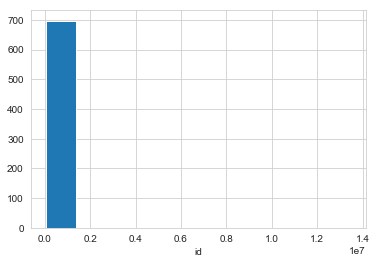

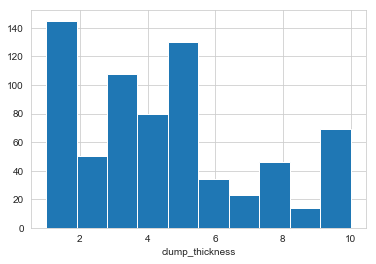

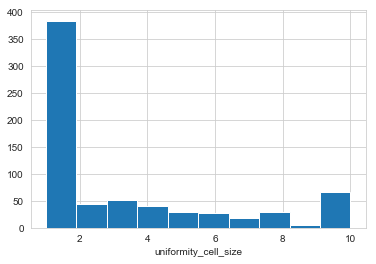

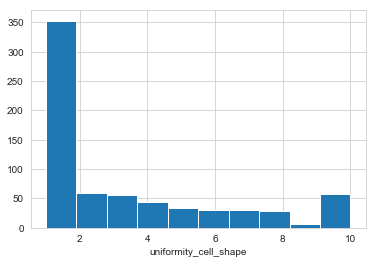

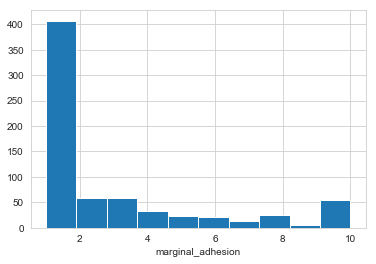

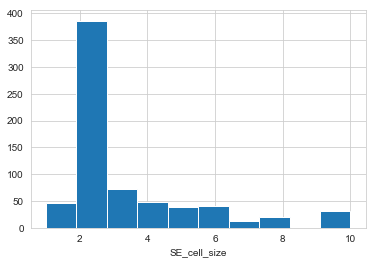

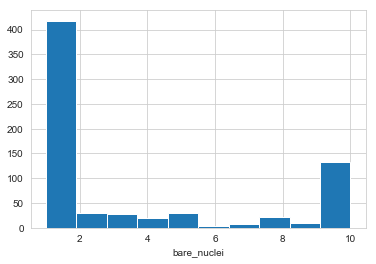

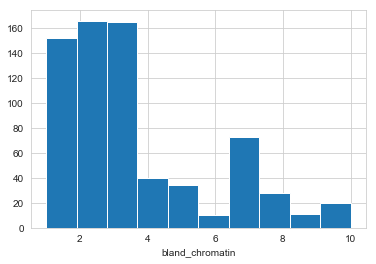

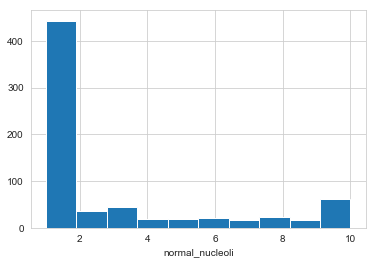

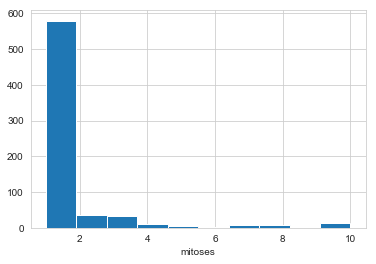

In [167]:
#histogram for each feature
n = data.shape[1]  #features
for i in range(n-1):
    plt.hist(data.iloc[:, i])
    col_name=list(data.columns.values)[i]
    plt.xlabel(col_name)
    plt.show()

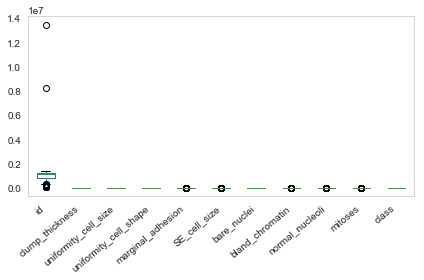

In [182]:
# boxplot for each feature in the dataset
ax = data.boxplot(grid=False, return_type='axes')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

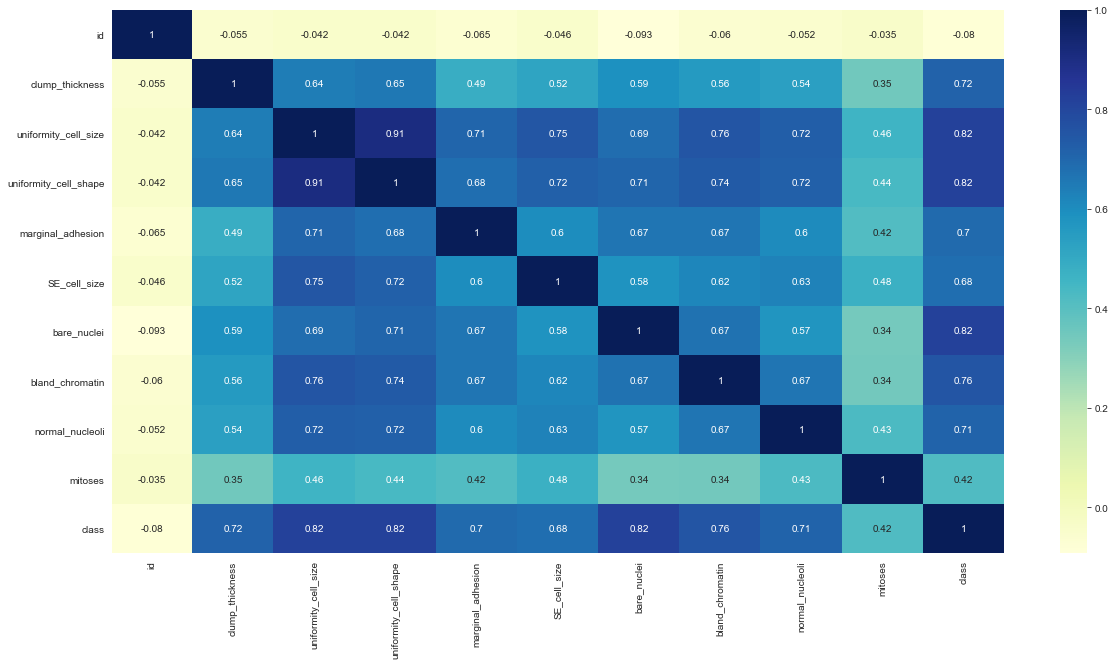

In [169]:
# Heat map to display correlation between all features:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

### Changing class values: 2-benign ,4-malignan) -> 0-benign, 1-malignant

In [170]:
data['class'] = data['class'].replace(2, 0)
data['class'] = data['class'].replace(4, 1)
data.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [228]:
data['class'].value_counts()

0    458
1    241
Name: class, dtype: int64

#### Since, the dataset seems to be relatively balanced. So, We can split the dataset in train and test. 

### 3.  Train a supervised learning model that can be used to generate predicions for our dataset
##### Seperate the labels (y) and the features (X) from the dataset

In [220]:
dataset = np.array(data)
X = dataset[:, 0:dataset.shape[1]-1]
y = dataset[:, -1]

In [221]:
print("X",X.shape ,"y",y.shape)

X (699, 10) y (699,)


In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [223]:
print("X_train",X_train.shape,"X_test", X_test.shape)
print("y_train",y_train.shape,"y_test", y_test.shape)

X_train (489, 10) X_test (210, 10)
y_train (489,) y_test (210,)


In [229]:
### Using scikit-learn’s DecisionTreeClassifier, train the model
#after hyperparameter tuning selected max_depth=5 as optimal value

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

### 4. Create a visualization of the decision tree

In [206]:
feature_names = list(data.columns.values)[0:10]
target_names = list(data.columns.values)[-1]

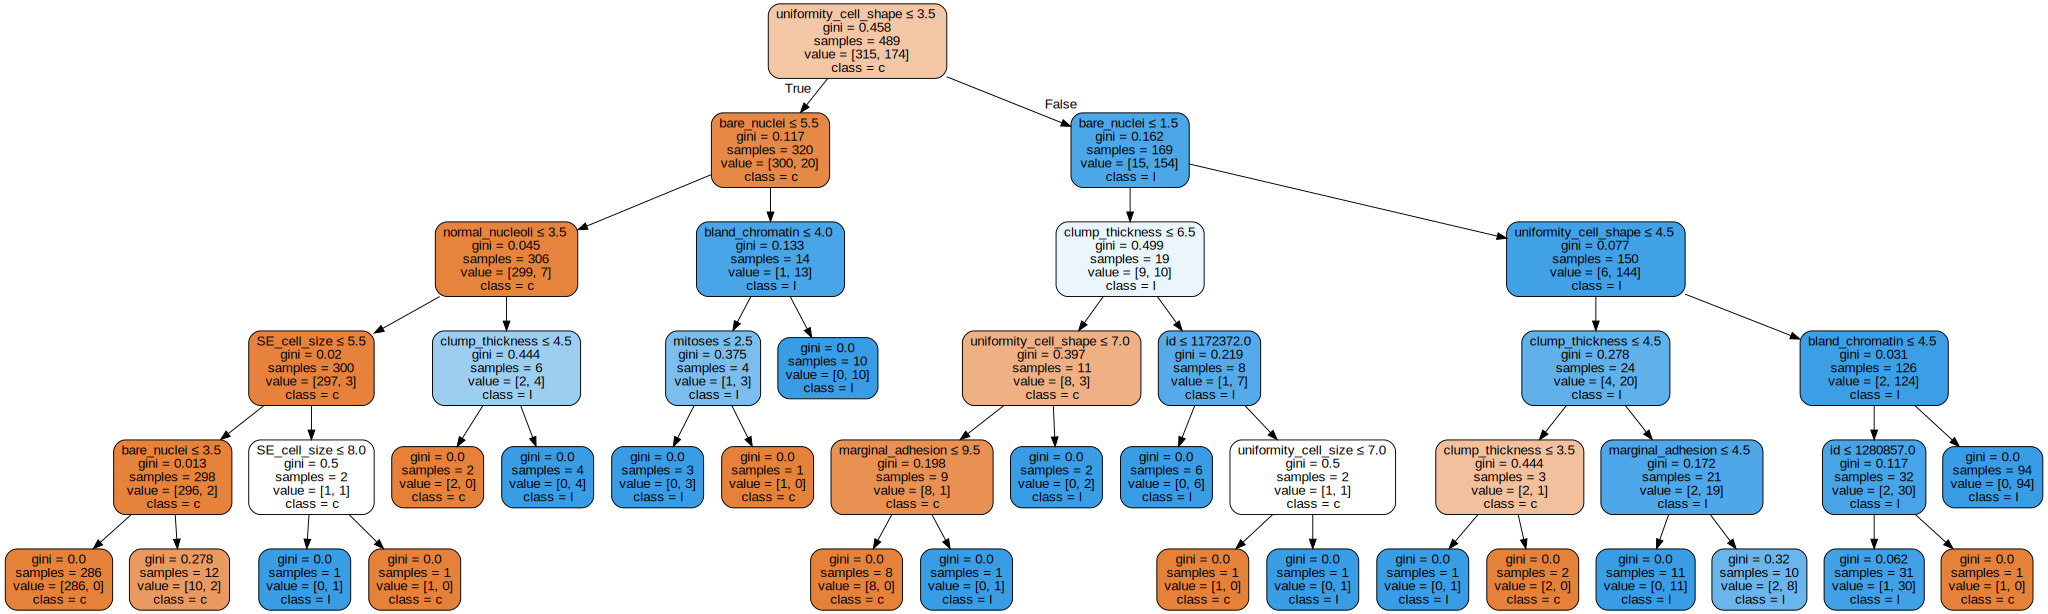

In [207]:
import graphviz 
data1 = tree.export_graphviz(clf, out_file=None,feature_names=feature_names, class_names=target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(data1)  
graph

In [230]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9523809523809523

### Accuracy of the model on the test dataset is 95.24 %

### 5. Create a new instance and generate a prediction for it. 

In [178]:
#Create a new instance and generate a prediction 
test_data = pd.DataFrame({
        'id':[1],
        'clump_thickness':[4],
        'uniformity_cell_size':[8],
        'uniformity_cell_shape':[8],
        'marginal_adhesion':[5],
        'SE_cell_size':[4],
        'bare_nuclei':[5],
       'bland_chromatin':[10],
        'normal_nucleoli':[4],
        'mitoses':[1],
        'class':[1]
})

In [179]:
test_data

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,SE_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1,4,8,8,5,4,5,10,4,1,1


In [180]:
test_data = test_data.values
X_test = test_data[:,0:10]
y_test = test_data[:,-1]
print("shape of x_test and y_test", X_test.shape,y_test.shape)

y_pred = clf.predict(X_test)
print("prediction (0-benign, 1-malignant) on this test data is",y_pred)

shape of x_test and y_test (1, 10) (1,)
prediction (0-benign, 1-malignant) on this test data is [1]


#### The Trained Model predicted correctly for this test data

Using the tree illustration as a reference, decision tree model generated the prediction based on the node split conditions
defined for features which starts from root to the terminal node(gini index=0) where it assign the class(1/0).

For example, for given test_data, if you follow the tree nodes ( based on the spliting criteria and the rules), you will end up predicting as class 1. So it make sense to me. 

I got the best accuracy ( 95.24%) with hyperparameter set as max_depth=5. If we increase the depth, it might cause overfitting.

We can also do normalization using sklearn standard scalar and then see the performance of the dataset.
